# Plot label count for classes

Plot and visualize label counts per class to gie an innitiat

In [1]:
%matplotlib inline
import os
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [10]:
def plot_class_counts(df, category):
    fig, ax = plt.subplots(figsize=(30, 10))
    categ_df = df[df['category']==category]
    group_df = categ_df.groupby('label').agg('count')
    
#     print(f'total species number is {len(group_df)}')
    
#     print(group_df)
    
    sort_df = group_df.sort_values(by='bbox', ascending=False)
    
    x_names = list(sort_df.index)
    y_values = list(sort_df['bbox'])
    sns_plot = sns.barplot(x=x_names, y=y_values, palette='rocket', ax=ax)
    
    
    for x_name, y_val in zip(x_names, y_values):
        print(f'{x_name}: {y_val}')
        
        
    current_palette = matplotlib.colors.hex2color('#86b92e')
    ax.axhline(0, color=current_palette, clip_on=False)
    ax.set_ylim([0, max(sort_df['bbox'])])
    ax.set_ylabel(f"Class count in {category}")
    ax.set_xlabel(f"Classes in {category}")
    _=ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)
    plt.tight_layout()
    fig.savefig(f"class_count_{category}.png")
    

In [3]:
sns.set_context("notebook", font_scale=3)
sns.set_style('darkgrid')

In [4]:
csvs = ['RR17_train.csv', 'TA25_train.csv', 'RR19_train.csv', 'SL25_train.csv']
dfs = []
for csv in csvs:
    df = pd.read_csv(csv)
    print(len(df))
    dfs.append(df)
    
master_df = pd.concat(dfs)
master_df.head()

16014
12860
14362
5341


,Unnamed: 0,image_id,label,bbox,category
0,0,CVAT/RR17/RR17-SGR-TWR_20141111-14/RR17-SGR-L-...,human,"[2344.28, 1605.81, 2366.14, 1664.84]",human_activities
1,1,CVAT/RR17/RR17-SGR-TWR_20141111-14/RR17-SGR-L-...,cow,"[2925.08, 1783.9, 2948.76, 1825.22]",livestock
2,2,CVAT/RR17/RR17-SGR-TWR_20141111-14/RR17-SGR-L-...,cow,"[3370.49, 1796.36, 3415.75, 1840.96]",livestock
3,3,CVAT/RR17/RR17-SGR-TWR_20141111-14/RR17-SGR-L-...,cow,"[2997.82, 1006.48, 3033.89, 1056.98]",livestock
4,4,CVAT/RR17/RR17-SGR-TWR_20141111-14/RR17-SGR-L-...,cow,"[3173.72, 1705.2, 3224.88, 1751.11]",livestock


In [5]:
labels = pd.Series(master_df['label']).unique()

In [6]:
labels

array(['human', 'cow', 'building', 'shoats', 'boma', 'zebra', 'elephant',
       'donkey', 'hippopotamus', 'sable', 'roan', 'Antelope', 'eland',
       'warthog', 'hartebeest', 'topi', 'giraffe', 'impala', 'buffalo',
       'kudu', 'Ostrich', 'Stork', 'Lion', 'Crane', 'gazelle',
       'waterbuck', 'oryx', 'charcoal sack', 'charcoal mound',
       'wildebeest'], dtype=object)

In [7]:
len(labels)

30

In [8]:
len(master_df)

48577

building: 5018
human: 2729
boma: 608
charcoal sack: 94
charcoal mound: 18
cow: 18366
shoats: 9092
donkey: 269
buffalo: 4007
elephant: 2249
impala: 1735
zebra: 1304
wildebeest: 976
Antelope: 497
giraffe: 314
eland: 302
gazelle: 254
hartebeest: 219
kudu: 136
Ostrich: 94
topi: 90
hippopotamus: 72
warthog: 43
roan: 27
waterbuck: 24
Crane: 15
oryx: 11
Lion: 7
sable: 5
Stork: 2


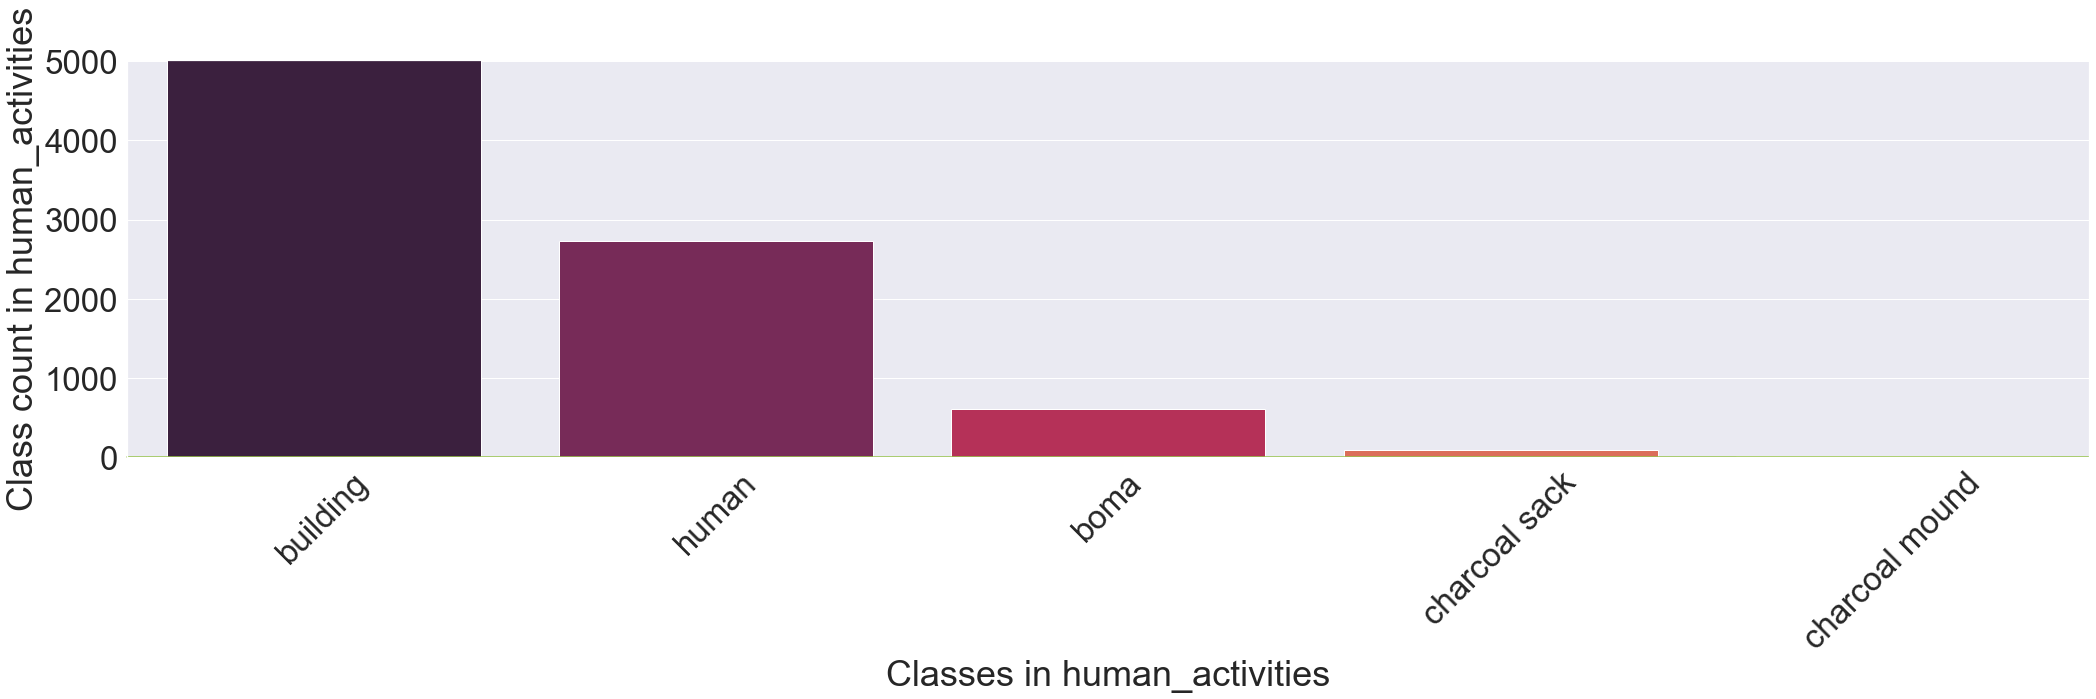

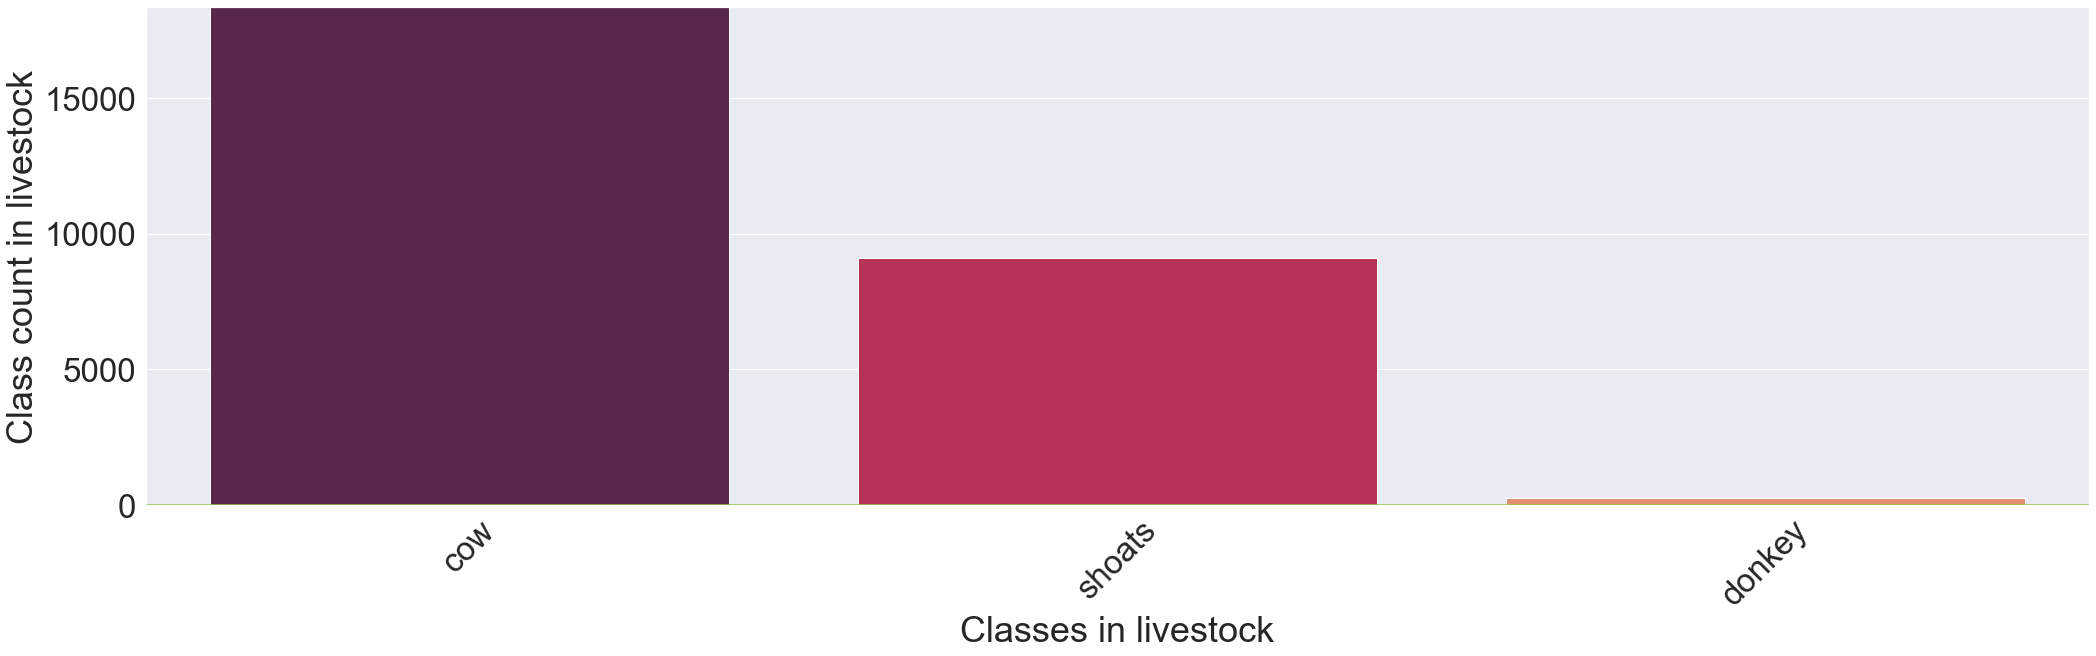

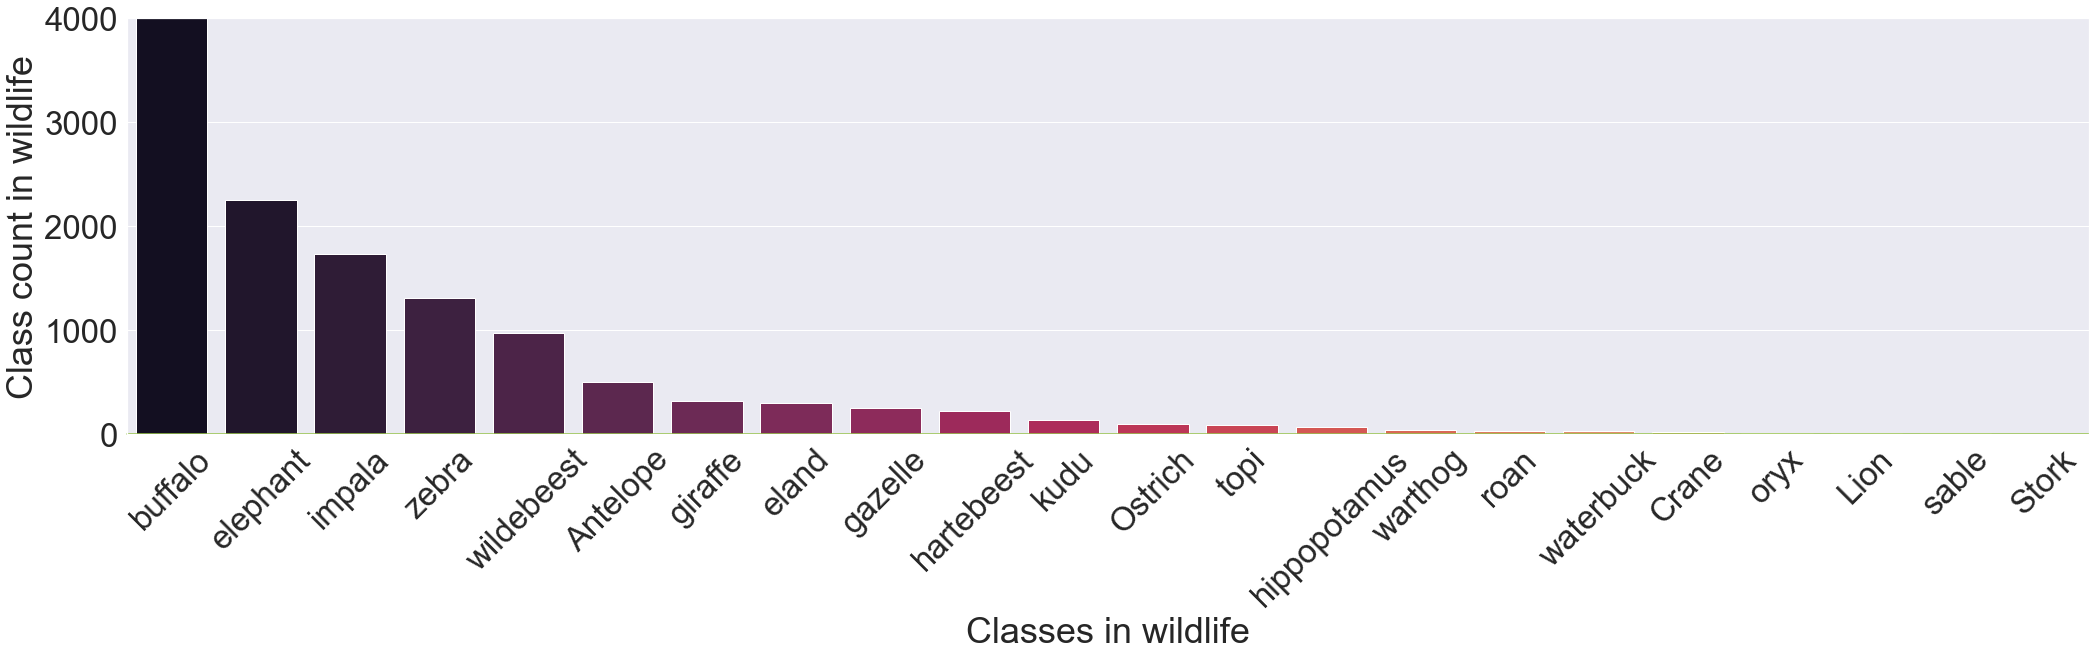

In [12]:
categories = pd.Series(master_df['category']).unique()

for cat in categories:
#     print(cat)
    plot_class_counts(master_df, cat)